In [2]:
#key tasks
#Step 1: Data Understanding & Exploration
#load and inspect dataset
import pandas as pd
df = pd.read_csv("CarPricePrediction.csv")

print("🔹 First 5 rows:")
print(df.head())


In [3]:
#Check for Missing Values and Data Types
print("🔹 Dataset Info:")
df.info()

print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

🔹 Missing Values per Column:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [4]:
#Summary Statistics
print("🔹 Descriptive Statistics:")
df.describe(include='all')

🔹 Descriptive Statistics:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


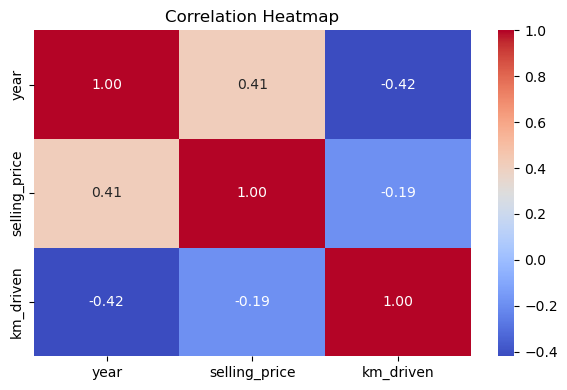

In [6]:
#Correlation and heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


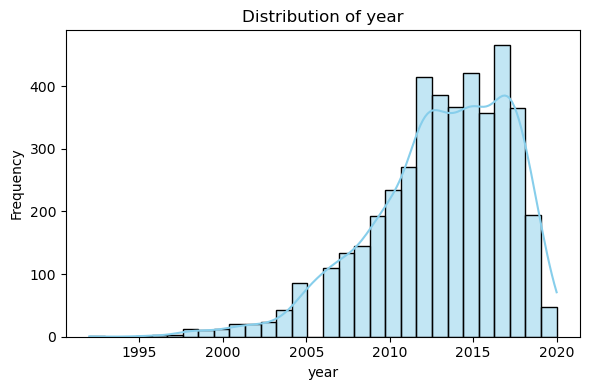

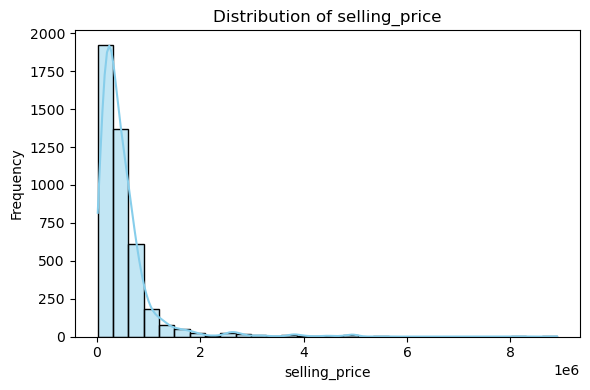

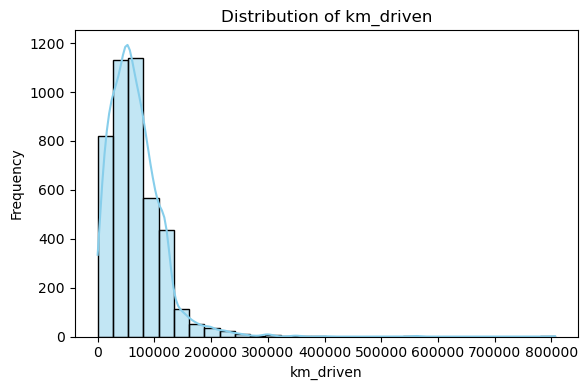

In [7]:
#Histograms for Data Distribution
numeric_cols = ['year', 'selling_price', 'km_driven']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


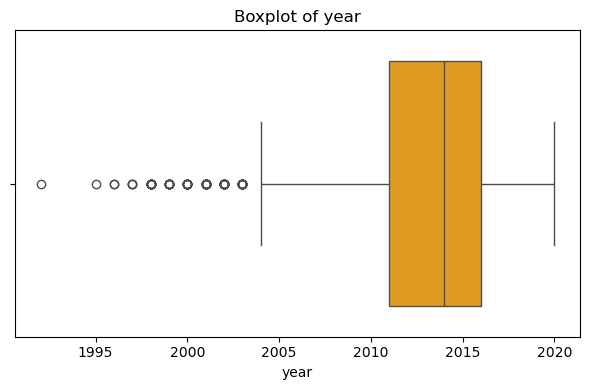

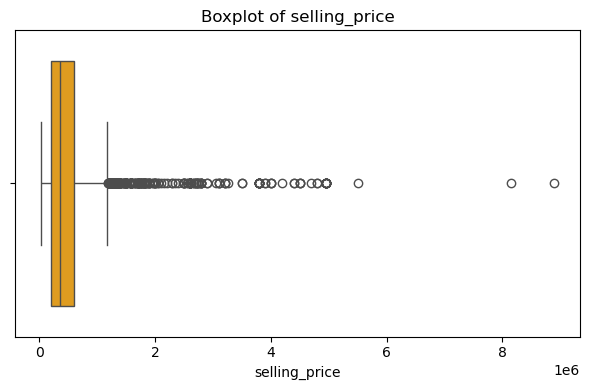

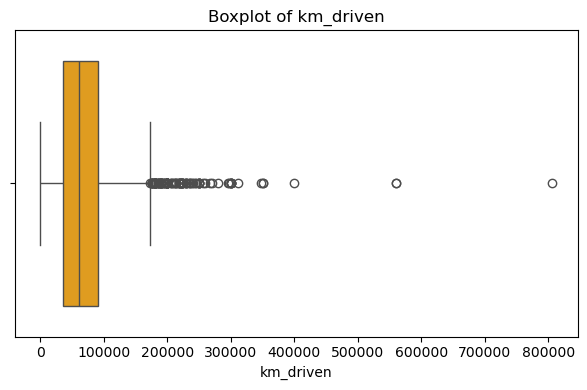

In [8]:
#boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
Insigths-
Correlation > 0.4 → moderate/strong relationship
Right-skewed histograms → many low-priced/older/high-km cars
Boxplots help spot outliers (e.g., extremely high km_driven or selling_price)

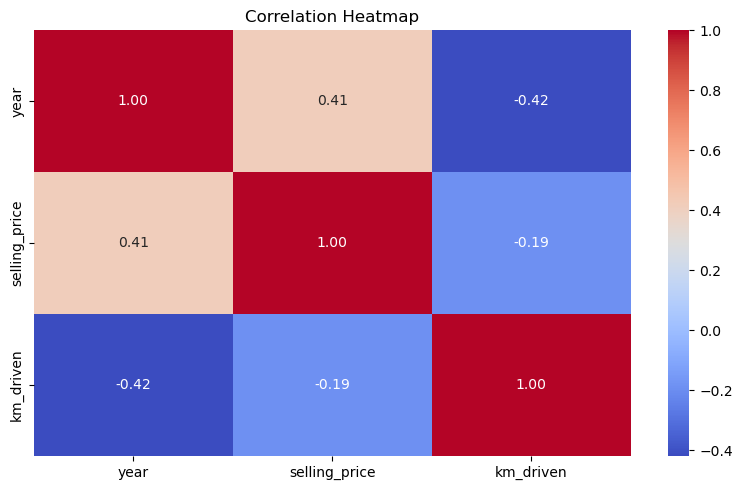

In [9]:
#EDA visualisation
#Heatmap – Correlation Between Features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


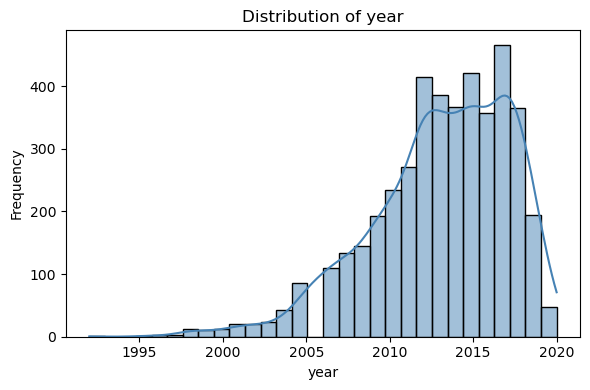

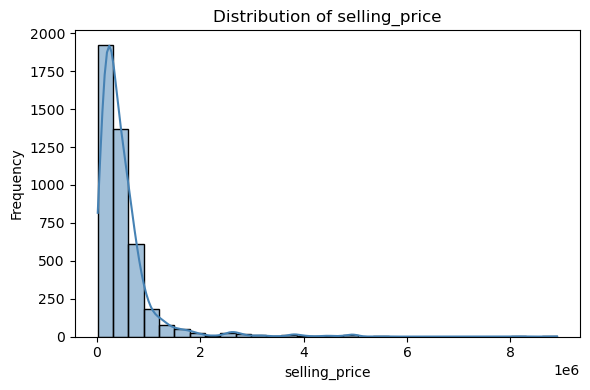

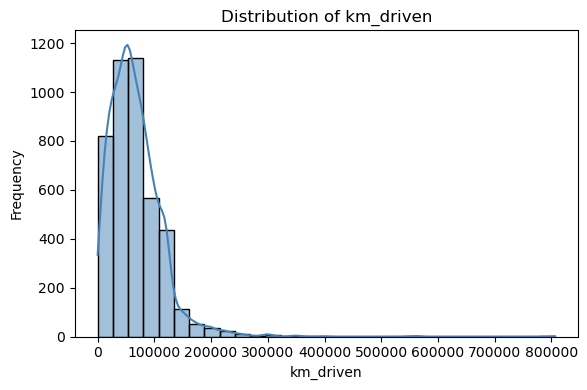

In [10]:
#HIstogram
numerical_cols = ['year', 'selling_price', 'km_driven']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


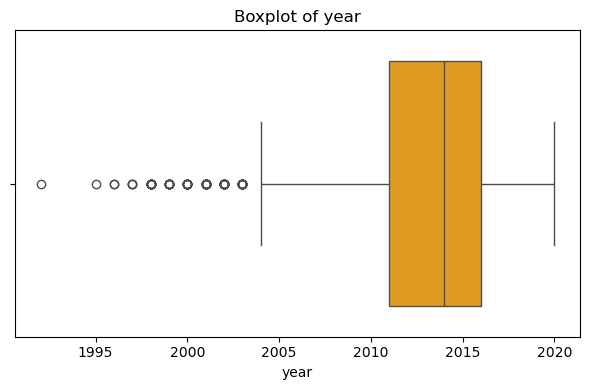

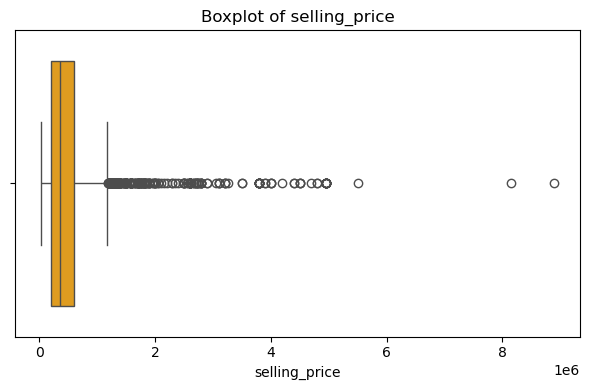

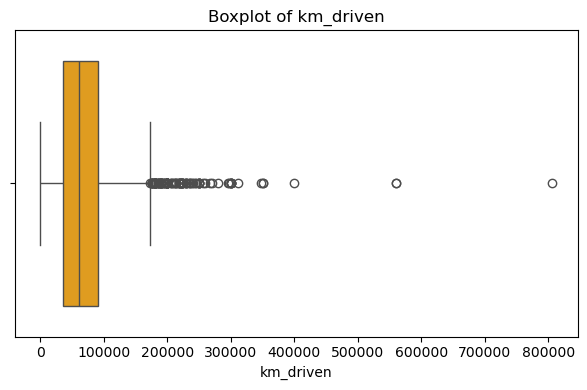

In [11]:
##Plot boxplots 
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
insights-
Newer cars have higher prices

More driven cars generally have lower value

Automatic transmission may be priced higher

Diesel/Petrol prices may vary based on year/mileage

In [25]:
#Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

df_model = df.drop(columns=['name'])
X = df_model.drop(columns=['selling_price'])
y = df_model['selling_price']

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_features = ['year', 'km_driven']

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical columns
)


In [21]:
#Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline(steps=[
    ('encode', column_transformer),
    ('scale', StandardScaler())
])


In [24]:
#  Train-Test Split (80:20) and Preprocess
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = preprocessing_pipeline.fit_transform(X_train_raw)
X_test = preprocessing_pipeline.transform(X_test_raw)

print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)


✅ X_train shape: (3472, 13)
✅ X_test shape: (868, 13)


In [ ]:
insigths:
Categorical features are OneHot encoded

Numerical features are scaled

Data is split into 80% training and 20% testing

In [26]:
#model developement
#Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("✅ Model training completed.")

✅ Model training completed.


In [27]:
# Predict on test data
y_pred = model.predict(X_test)

print("🔹 First 5 Predictions vs Actual:")
for pred, actual in zip(y_pred[:5], y_test[:5]):
    print(f"Predicted: ₹{pred:,.0f} | Actual: ₹{actual:,.0f}")


🔹 First 5 Predictions vs Actual:
Predicted: ₹429,791 | Actual: ₹165,000
Predicted: ₹504,491 | Actual: ₹250,000
Predicted: ₹60,211 | Actual: ₹120,000
Predicted: ₹475,380 | Actual: ₹450,000
Predicted: ₹1,519,809 | Actual: ₹730,000


In [ ]:
Insigths-
The model learns a linear relationship between features and car prices.

You’ll evaluate performance in the next step using MAE, MSE, RMSE, and R².

In [28]:
#Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score (Goodness of Fit): {r2:.4f}")


📈 Model Evaluation Metrics:
Mean Absolute Error (MAE): ₹221,706.37
Mean Squared Error (MSE): ₹182,146,878,750.28
Root Mean Squared Error (RMSE): ₹426,786.69
R² Score (Goodness of Fit): 0.4031


In [ ]:
insigths-
R² Score tells us how well the model explains the variability in the target (selling_price).
MAE shows the average error between predicted and actual prices.

RMSE penalizes larger errors more than MAE.

In [ ]:
#model interpretation 
feature_names = preprocessing_pipeline.named_steps['encode'].get_feature_names_out().tolist()
final_features = feature_names + ['year', 'km_driven']

coef_df = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df.head(10)


In [ ]:
Top features may include-
year: ⬆️ Newer cars → higher price

km_driven: ⬇️ More driven → lower price

fuel_Diesel: Typically higher resale value

owner_Second Owner: May reduce price slightly

transmission_Automatic: Can increase price

In [ ]:
#2. Model Strengths
 Interpretability: Linear Regression is easy to understand and explain.

 Speed: Trains fast even on large datasets.

 Baseline: Excellent first model for benchmarking.

 Feature Importance: Coefficients directly show impact.

In [ ]:
#3. Model Limitations
Assumes linearity: Cannot capture complex patterns or interactions.

Sensitive to outliers: A few extreme data points can distort predictions.

Feature scaling needed: Especially if features are on different scales.

No feature interaction: Doesn’t consider combinations unless manually created.

In [ ]:
● Explain potential underfitting or overfitting issues.
Overfitting happens when a model learns the training data too well, including noise and random fluctuations, and fails to generalize to new,
unseen data. Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on
both training and new data. 

In [31]:
#Remove outliners
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df_clean = remove_outliers(df, 'selling_price')
df_clean = remove_outliers(df_clean, 'km_driven')

print(f"🧼 Cleaned dataset shape: {df_clean.shape}")


🧼 Cleaned dataset shape: (3962, 8)


In [32]:
#Feature Selection using Correlation
corr_matrix = df_clean.corr(numeric_only=True)
target_corr = corr_matrix['selling_price'].abs().sort_values(ascending=False)

print("📊 Feature correlation with target:")
print(target_corr)

useful_features = target_corr[target_corr > 0.05].index.tolist()
useful_features.remove('selling_price')


📊 Feature correlation with target:
selling_price    1.000000
year             0.630198
km_driven        0.285932
Name: selling_price, dtype: float64
